In [472]:
using CSV, DataFrames
# Col 1 is Wavelength
# Col 2 - end are the reflection coefficient parameters for each wavelength.

data_A = CSV.read("Sample A_FOR_MATLAB.txt", DataFrame; 
    delim='\t', ignorerepeated=true, header = false, types=Float64, ignoreemptyrows=true);
data_B = CSV.read("Sample B_FOR_MATLAB.txt", DataFrame; 
    delim='\t', ignorerepeated=true, header = false, types=Float64, ignoreemptyrows=true);
data_C = CSV.read("Sample C_FOR_MATLAB.txt", DataFrame; 
    delim='\t', ignorerepeated=true, header = false, types=Float64, ignoreemptyrows=true);
data_D = CSV.read("Sample D_FOR_MATLAB.txt", DataFrame; 
    delim='\t', ignorerepeated=true, header = false, types=Float64, ignoreemptyrows=true);


In [473]:
data_A[1]

678-element Vector{Float64}:
  246.139359
  247.71817
  249.297028
  250.8759
  252.454803
  254.033768
  255.612747
  257.191772
  258.770813
  260.349915
  261.929047
  263.508209
  265.087372
    ⋮
 1651.529053
 1655.002319
 1658.476318
 1661.950806
 1665.425781
 1668.901367
 1672.377563
 1675.854248
 1679.331421
 1682.809326
 1686.28772
 1689.766602

Define the size of all matrices (I can just use data_A, because the others are identical), and then I identify the length of the row and the length of the column - I need these so I can read and "place" the data from a particular row (corresponding to a specific wavelength) into one array representing a specific set of r_p and r_s values for a sequence of angles (which can be found in the Angle array). This array is actually calculated because I know the initial angle and the angle step size.

In [474]:
data_size = size(data_A)

(678, 33)

In [475]:
row_length = data_size[1]

678

In [476]:
column_length = data_size[2]

33

In [477]:
c = 0;
theta_v = 45:2:45+(2*(column_length-1)/2-1)

45.0:2.0:75.0

In [478]:
length(theta_v)

16

In [479]:
using Plots

Separating p and s intensity data to a column vector for plotting purpose
Because my  and  data is located in alternating columns, I increment the "read" by 2, and the "write" by 1.
I want to calculate the  that corresponds to each wavelength and use that to calculate an average . I will also calculate standard deviation, to see how consistent my data is. 
I will analyze all the provided data sets, to gain some understanding of the strengths and weaknesses of this method in identifying the Brewster angle.
r: row number
c: column number c=1: , c=2,4,6, ...end-1:  data, c=3,5,7,...end:  data

In [480]:
df_Ap = [data_A[1,col] for col in 2:2:column_length];
df_As = [data_A[1,col] for col in 3:2:column_length];
plot(theta_v, df_Ap, 
    label = "p-intensity", title = "Sample A", titlefontsize =10, legendfontsize = 8)
p11 = plot!(theta_v, df_As, 
    label = "s-intensity");

In [481]:
df_Bp = [data_B[1,col] for col in 2:2:column_length];
df_Bs = [data_B[1,col] for col in 3:2:column_length];
plot(theta_v, df_Bp, 
    label = "p-intensity", title = "Sample B", titlefontsize = 10, legendfontsize = 8)
p12 = plot!(theta_v, df_Bs, 
    label = "s-intensity");

In [482]:
df_Cp = [data_C[1,col] for col in 2:2:column_length];
df_Cs = [data_C[1,col] for col in 3:2:column_length];
plot(theta_v, df_Cp, 
    label = "p-intensity", title = "Sample C", titlefontsize = 10, legendfontsize = 8)
p13 = plot!(theta_v, df_Cs, 
    label = "s-intensity");

In [483]:
df_Dp = [data_D[1,col] for col in 2:2:column_length];
df_Ds = [data_D[1,col] for col in 3:2:column_length];
plot(theta_v, df_Dp, 
    label = "p-intensity", title = "Sample D", titlefontsize = 10, legendfontsize = 8)
p14 = plot!(theta_v, df_Ds, 
    label = "s-intensity");

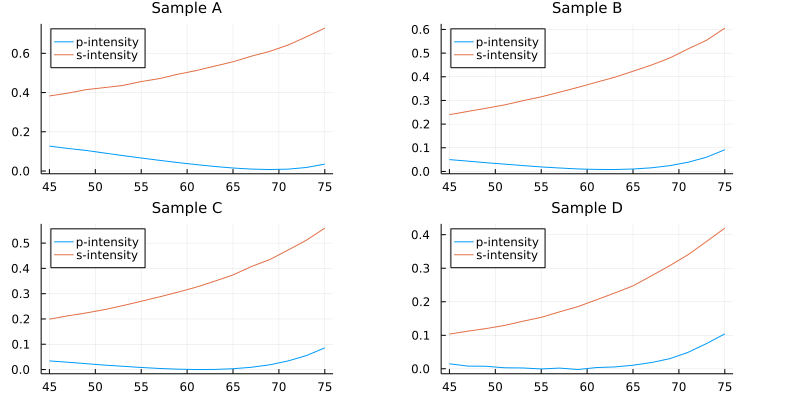

In [484]:
plot(p11,p12,p13,p14, layout = (2,2), legendposition =:topleft, legendfontsize = 8)

In [485]:
λ_A = data_A[1]
λ_B = data_B[1]
λ_C = data_C[1];

In [486]:
λ_D = data_D[1];

In [487]:
Ncurves = 10
N = length(λ_A)
incr = ceil(N/Ncurves)
row_inc_vec = 1:incr:N

1.0:68.0:613.0

In [488]:
A_p_vecs = [data_A[convert(Int64,i),col] for col in 2:2:column_length, i in row_inc_vec];
A_s_vecs = [data_A[convert(Int64,i),col] for col in 3:2:column_length, i in row_inc_vec];

B_p_vecs = [data_B[convert(Int64,i),col] for col in 2:2:column_length, i in row_inc_vec];
B_s_vecs = [data_B[convert(Int64,i),col] for col in 3:2:column_length, i in row_inc_vec];

C_p_vecs = [data_C[convert(Int64,i),col] for col in 2:2:column_length, i in row_inc_vec];
C_s_vecs = [data_C[convert(Int64,i),col] for col in 3:2:column_length, i in row_inc_vec];

D_p_vecs = [data_D[convert(Int64,i),col] for col in 2:2:column_length, i in row_inc_vec];
D_s_vecs = [data_D[convert(Int64,i),col] for col in 3:2:column_length, i in row_inc_vec];

In [489]:
p21 = plot(theta_v, A_p_vecs,
    legend = false, title = "Sample A");
p22 = plot(theta_v, B_p_vecs,
    legend = false, title = "Sample B");
p23 = plot(theta_v, C_p_vecs,
    legend = false, title = "Sample C");
p24 = plot(theta_v, D_p_vecs,
    legend=false, title = "Sample D");

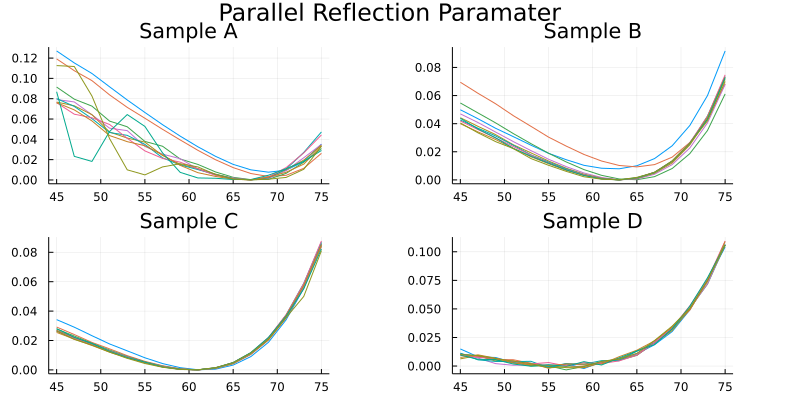

In [490]:
p2 = plot(p21,p22,p23,p24, layout = (2,2), plottitle = "Parallel Reflection Parameters")
p2[:plot_title] = "Parallel Reflection Paramater"
plot(p2)

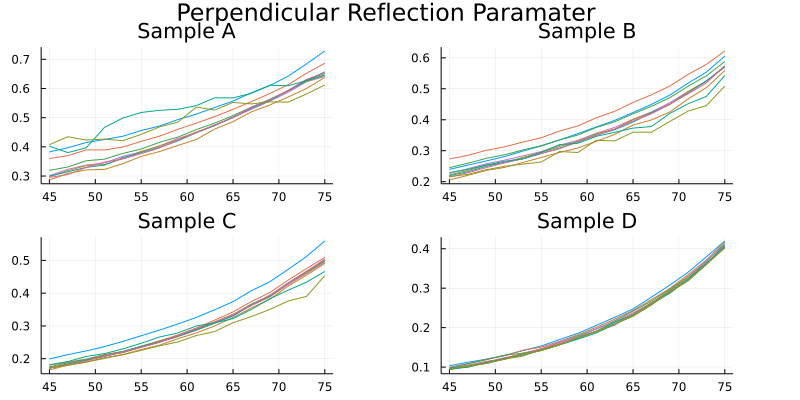

In [491]:
p21 = plot(theta_v, A_s_vecs,
    legend = false, title = "Sample A");
p22 = plot(theta_v, B_s_vecs,
    legend = false, title = "Sample B");
p23 = plot(theta_v, C_s_vecs,
    legend = false, title = "Sample C");
p24 = plot(theta_v, D_s_vecs,
    legend=false, title = "Sample D");
p2 = plot(p21,p22,p23,p24, layout = (2,2), plottitle = "Perpendicular Reflection Parameters")
p2[:plot_title] = "Perpendicular Reflection Paramater"
plot(p2)

In [492]:
A_p_vecs;

In [530]:
larger_A = [data_A[convert(Int64,i),col] for col in 2:2:column_length, i in 1:2:N];
larger_B = [data_B[convert(Int64,i),col] for col in 2:2:column_length, i in 1:2:N];


larger_C = [data_C[convert(Int64,i),col] for col in 2:2:column_length, i in 1:2:N];
larger_D = [data_D[convert(Int64,i),col] for col in 2:2:column_length, i in 1:1:1200];

In [539]:
ind_A_min = [argmin(larger_A[:,col]) for col in 1:1:339]
ind_B_min = [argmin(larger_B[:,col]) for col in 1:1:339]
ind_C_min = [argmin(larger_C[:,col]) for col in 1:1:339]
ind_D_min = [argmin(larger_D[:,col]) for col in 1:1:1200];

In [540]:
Ap_mins = [minimum(larger_A[:,col]) for col in 1:1:339]
Bp_mins = [minimum(larger_B[:,col]) for col in 1:1:339]
Cp_mins = [minimum(larger_C[:,col]) for col in 1:1:339]
Dp_mins = [minimum(larger_D[:,col]) for col in 1:1:1200];

In [541]:
data_A[1][1:2:678];

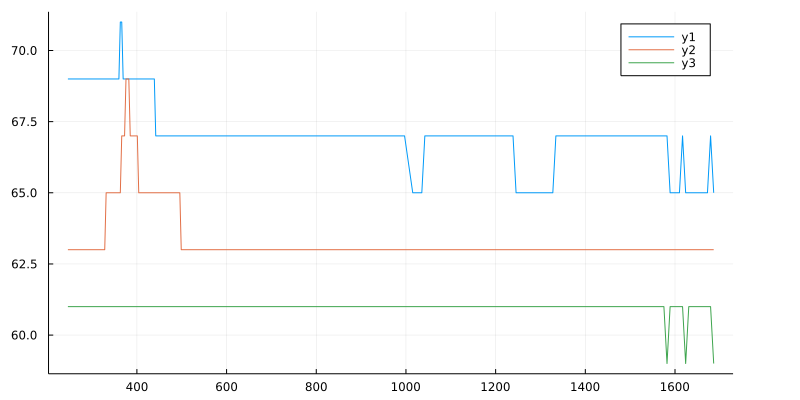

In [542]:
plot(data_A[1][1:2:678],theta_v[ind_A_min])
plot!(data_B[1][1:2:678],theta_v[ind_B_min])
p31 = plot!(data_C[1][1:2:678],theta_v[ind_C_min])

In [543]:
plot(data_A[1][1:2:678], Ap_mins)
plot!(data_B[1][1:2:678], Bp_mins)
p32 = plot!(data_C[1][1:2:678], Cp_mins);

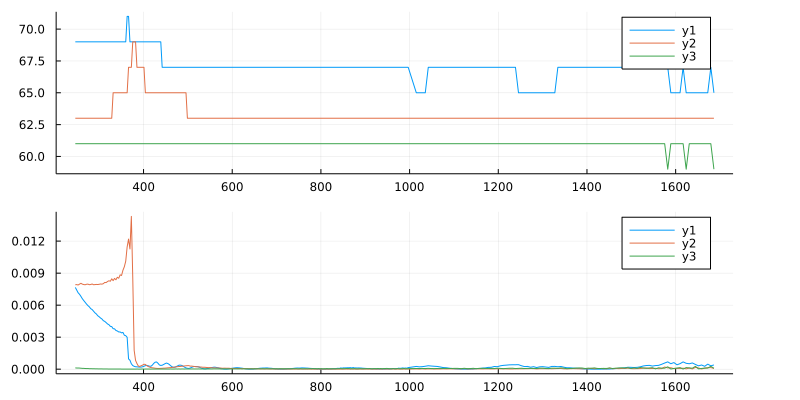

In [544]:
plot(p31, p32, layout = (2,1))

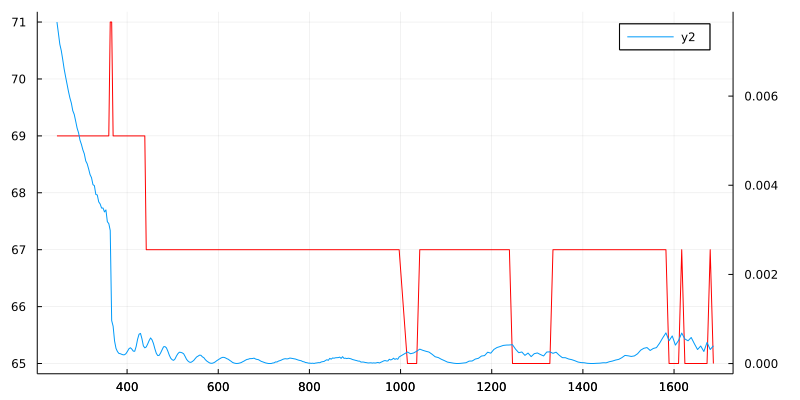

In [545]:
default(size=(800,400),thickness_scaling=1, rightmargin = 1.5Plots.cm)

plot(data_A[1][1:2:678], theta_v[ind_A_min], color=:red)
plot!(twinx(),data_A[1][1:2:678], Ap_mins)

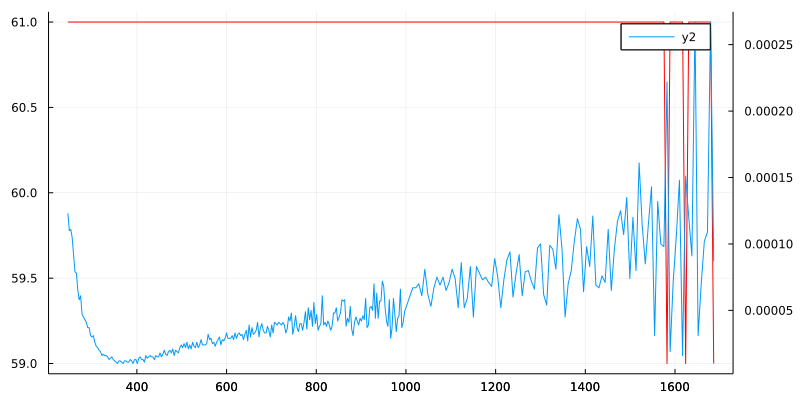

In [546]:
plot(data_C[1][1:2:678], theta_v[ind_C_min], color=:red)
plot!(twinx(),data_C[1][1:2:678], Cp_mins)

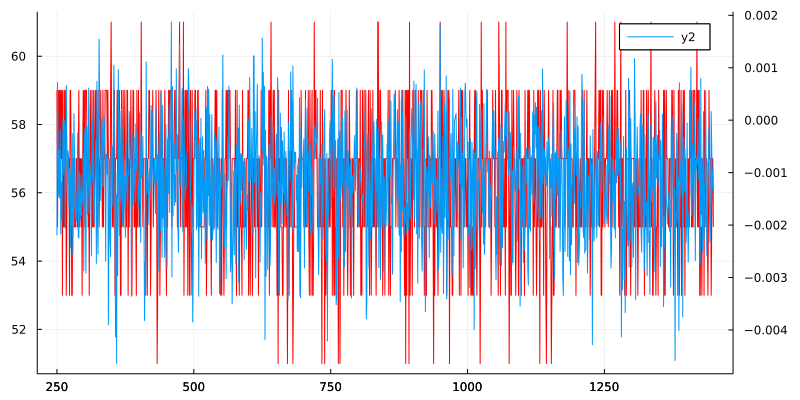

In [547]:
plot(data_D[1][1:1:1200], theta_v[ind_D_min], color=:red)
plot!(twinx(),data_D[1][1:1:1200], Dp_mins)

In [510]:
using Statistics
sA = [mean(Ap_mins), mean(theta_v[ind_A_min])]

2-element Vector{Float64}:
  0.000702929203539823
 67.20058997050147

In [511]:
sB = [mean(Bp_mins), mean(theta_v[ind_B_min])]

2-element Vector{Float64}:
  0.001141607669616519
 63.40117994100295

In [512]:
sC = [mean(Cp_mins), mean(theta_v[ind_C_min])]

2-element Vector{Float64}:
  5.040117994100296e-5
 60.982300884955755

In [513]:
sD = [mean(Dp_mins), mean(theta_v[ind_D_min])]

2-element Vector{Float64}:
 -0.0011444233333333333
 56.66961651917404

In [522]:
ε₁ = 8.85e-12 # F/m
ε₂(angle) = (tan(angle)^2)

ε₂ (generic function with 1 method)

In [558]:
[ε₂(sA[2]) ε₂(sB[2]) ε₂(sC[2]) ε₂(sD[2])]

1×4 Matrix{Float64}:
 7.80899  0.409625  12.2078  0.0147725

In [569]:
es = [ε₂(angle) for angle in theta_v[ind_C_min]];

In [568]:
ε₁*mean(es)

1.2295612038026906e-10